# 项目：分析鸢尾花种类数据

## 分析目标

此数据分析报告的目的是基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异，让我们可以对不同种类鸢尾花的属性特征进行推断。

## 简介

原始数据`Iris.csv`包括两种鸢尾花，每种有 50 个样本，以及每个样本的一些属性，包括萼片的长度和宽度、花瓣的长度和宽度。

`Iris.csv`每列的含义如下：
- Id：样本的ID。
- SepalLengthCm：萼片的长度（单位为厘米）。
- SepalWidthCm：萼片的宽度（单位为厘米）。
- PetalLengthCm：花瓣的长度（单位为厘米）。
- PetalWidthCm：花瓣的宽度（单位为厘米）。
- Species：鸢尾花种类。

## 读取数据

In [1]:
import pandas as pd 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest

In [2]:
original_data = pd.read_csv('iris.csv')
original_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


## 评估和清理数据

在这一部分中，我们将对在上一部分建立的`original_data`DataFrame所包含的数据进行评估和清理。

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

为了区分开经过清理的数据和原始的数据，我们创建新的变量`cleaned_data`，让它为`original_data`复制出的副本。我们之后的清理步骤都将被运用在`cleaned_data`上。

In [3]:
cleaned_data = original_data.copy()

### 整齐度

In [4]:
cleaned_data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
11,12,4.8,3.4,1.6,0.2,Iris-setosa
64,65,5.6,2.9,3.6,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
88,89,5.6,3.0,4.1,1.3,Iris-versicolor
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
78,79,6.0,2.9,4.5,1.5,Iris-versicolor


随机抽取十行观察值观察，数据结构整齐，结构清晰，无需调整。

### 干净度

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


`Id`列的数据表示样本ID，类型不应该为整型，转换为`object`。

In [6]:
cleaned_data['Id'] = cleaned_data['Id'].astype('str')

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    object 
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), object(2)
memory usage: 4.8+ KB


#### 缺失数据

通过`info`方法观察到，样本不存在缺失值。

#### 重复数据

In [8]:
cleaned_data.duplicated().sum()

0

样本不存在重复数据

#### 不一致数据

只有`Species`是分类数据，所以我们需要检查是否存在不一致数据表示意思相同。

In [9]:
cleaned_data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

从以上输出结果来看，`Species`只有两种可能的值，`Iris-versicolor`和`Iris-setosa`，不存在不一致数据。

我们可以把这列的类型转换为`Category`，好处是比字符串类型更节约内存空间，也能表明说值的类型有限。

In [10]:
cleaned_data['Species'] = cleaned_data['Species'].astype('category')
cleaned_data['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
95    Iris-versicolor
96    Iris-versicolor
97    Iris-versicolor
98    Iris-versicolor
99    Iris-versicolor
Name: Species, Length: 100, dtype: category
Categories (2, object): ['Iris-setosa', 'Iris-versicolor']

#### 无效或失效数据

In [11]:
cleaned_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


从以上统计信息来看，`cleaned_data`里不存在脱离现实意义的数值。

## 整理数据

对数据的整理，与分析方向紧密相关。此次数据分析目标是，基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异。

那么我们可以对数据基于`Species`列，先把各个鸢尾花种类样本数据的子表筛选出来。

In [12]:
iris_setosa = cleaned_data.query('Species == "Iris-setosa"')
len(iris_setosa)

50

In [13]:
iris_versicolor = cleaned_data.query('Species == "Iris-versicolor"')
len(iris_versicolor)

50

## 探索数据

在着手推断统计学分析之前，我们可以先借助数据可视化，探索`Setosa`和`Versicolor`这两种鸢尾花的变量特点。

可视化探索可以帮我们对数据有一个更直观的理解，比如了解数据的分布、发现变量之间的关系，等等，从而为后续的进一步分析提供方向。

针对数值，我们可以直接绘制成对图，利用其中的密度图查看不同变量的分布，以及利用散点图了解变量之间的关系。

并且，由于此次分析目的是了解不同种类鸢尾花的属性特征是否存在差异，我们可以利用颜色对图表上不种类类的样本进行分类。

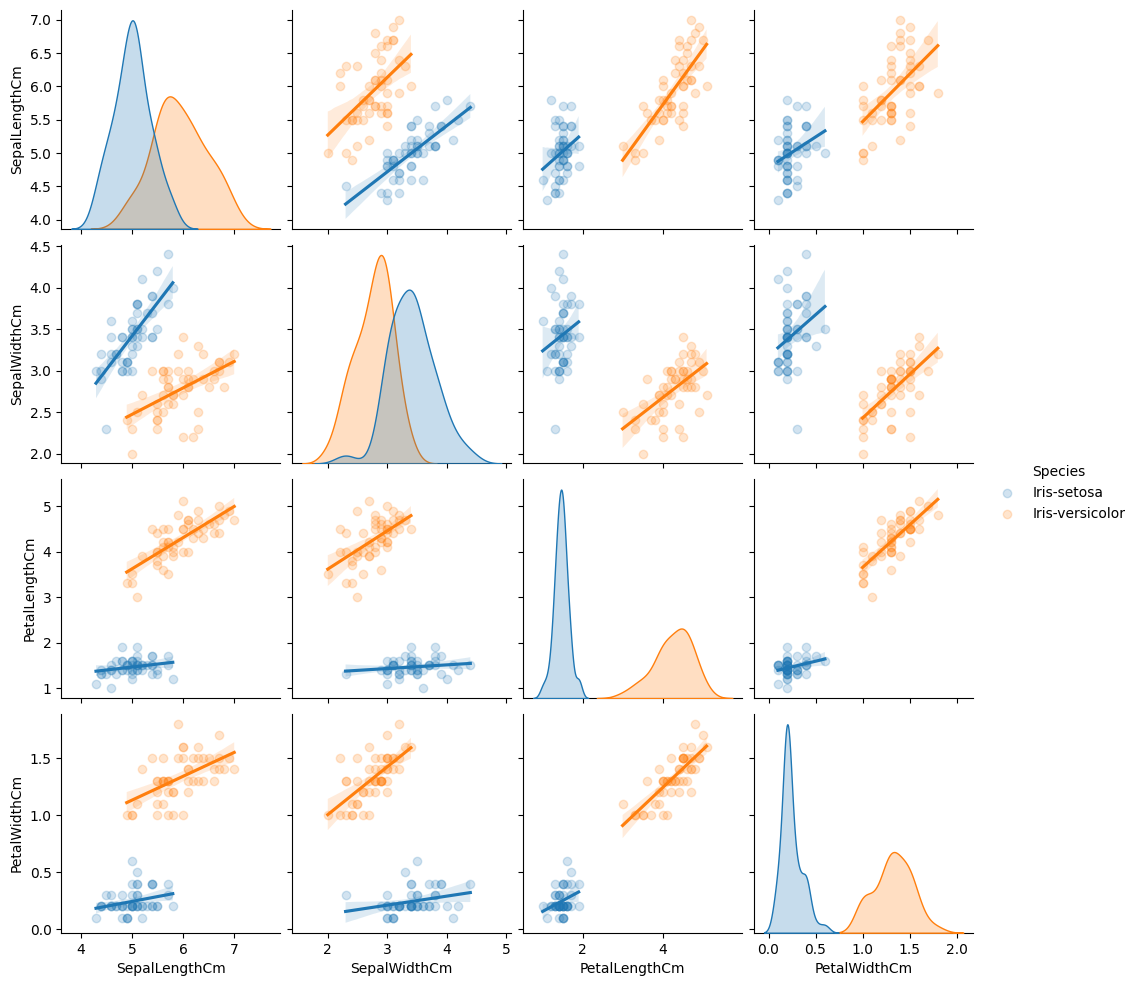

In [14]:
sns.pairplot(cleaned_data , hue = 'Species' , kind = 'reg' ,plot_kws = {'scatter_kws':{'alpha':0.2}})
plt.show()

从以上可以看出，`Setosa`和`Versicolor`样本的花瓣长度以及花瓣宽度的分布存在明显数值上的不同，已经可以猜测假设检验的结果是，两种鸢尾花的花瓣长度与宽度有统计显著性差异。

萼片的长度和宽度在分布上存在重叠，暂时无法仅通过图表下结论，需要进行假设检验，来推断总体的萼片长度和宽度之间是否有差异。

## 分析数据

我们将利用假设检验，依次检验`Setosa`和`Versicolor`这两种鸢尾花在萼片、花瓣的长度和宽度平均值方面，是否存在统计显著性差异。

由于我们只有样本数据，不知道总体的标准差，加上两组样本数各为50，样本数量不大，因此进行t检验，而不是z检验。假设此数据集样本符合t检验的两个前提：样本为随机抽样，总体呈正态分布。


### 分析萼片长度

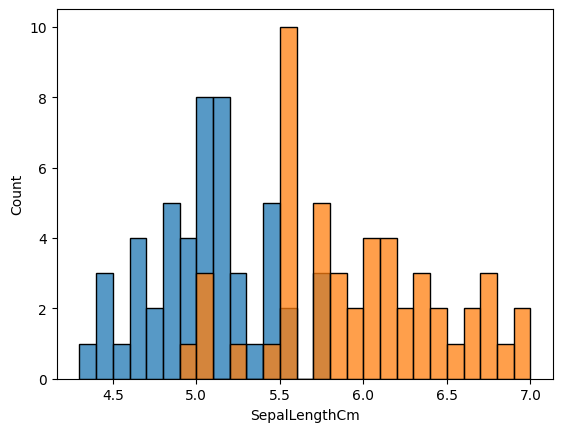

In [15]:
sns.histplot(iris_setosa['SepalLengthCm'] , binwidth = 0.1)
sns.histplot(iris_versicolor['SepalLengthCm'] , binwidth = 0.1)
plt.show()

#### 建立假设

$H_0$：Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值不存在显著区别。  
$H_1$：Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著区别。  

#### 确认单尾检验还是双尾检验

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更长，所以是双尾检验。

#### 确定显著水平

双尾检验的显著水平设置为0.05

#### 计算t值和p值

In [16]:
t_stat , p_value = ttest_ind(iris_setosa['SepalLengthCm'] , iris_versicolor['SepalLengthCm'])
print(t_stat)
print(p_value)

-10.52098626754911
8.985235037487079e-18


#### 结论

由于p值明显小于显著水平，因此我们拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著区别。

### 分析萼片宽度

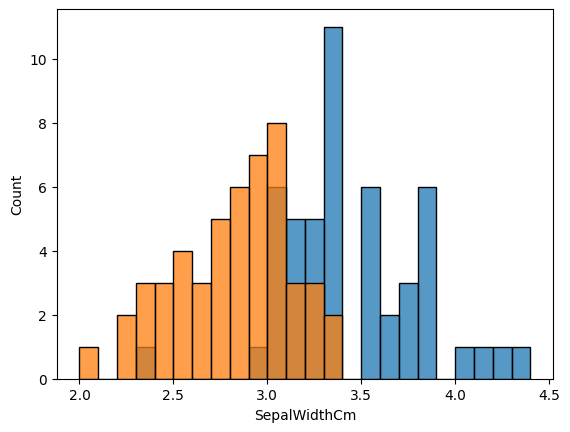

In [17]:
sns.histplot(iris_setosa['SepalWidthCm'] , binwidth = 0.1)
sns.histplot(iris_versicolor['SepalWidthCm'] , binwidth = 0.1)
plt.show()

#### 建立假设

$H_0$：Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值不存在显著区别。  
$H_1$：Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值存在显著区别。  

#### 确定单双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更长，所以是双尾检验。

#### 确定显著水平

我们将显著水平设置为0.05

#### 计算t值和p值

In [22]:
t_stat , p_value = ttest_ind(iris_setosa['SepalWidthCm'] , iris_versicolor['SepalWidthCm'])
print(t_stat)
print(p_value)

9.282772555558111
4.362239016010214e-15


#### 结论

由于p值小于显著水平0.05，我们因此拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值存在显著区别。

### 分析花瓣长度

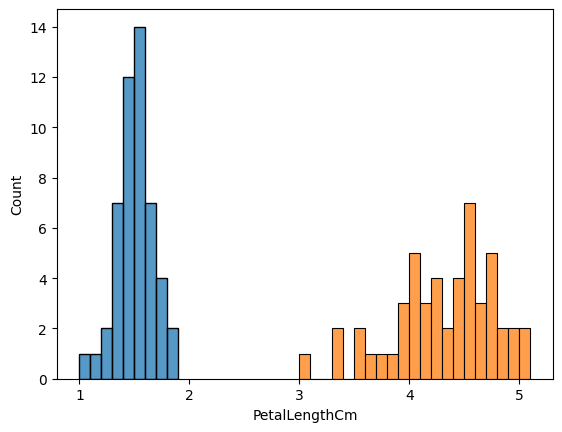

In [21]:
sns.histplot(iris_setosa['PetalLengthCm'] , binwidth = 0.1)
sns.histplot(iris_versicolor['PetalLengthCm'] , binwidth = 0.1)
plt.show()

#### 建立假设    

$H_0$：Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值不存在显著区别。   
$H_1$：Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值存在显著区别。    

#### 确定单双尾  

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更长，所以是双尾检验。  

#### 确定显著水平  

我们将显著水平设置为0.05

#### 计算t值和p值  

In [23]:
t_stat , p_value = ttest_ind(iris_setosa['PetalLengthCm'] , iris_versicolor['PetalLengthCm'])
print(t_stat)
print(p_value)

-39.46866259397272
5.717463758170621e-62


#### 结论  

由于p值小于显著水平0.05，我们因此拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值存在显著区别。

### 分析花瓣宽度

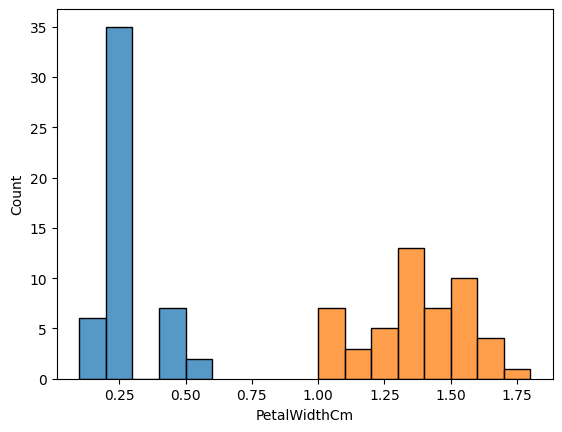

In [24]:
sns.histplot(iris_setosa['PetalWidthCm'] , binwidth = 0.1)
sns.histplot(iris_versicolor['PetalWidthCm'] , binwidth = 0.1)
plt.show()

#### 建立假设    

$H_0$：Setosa鸢尾花和Versicolor鸢尾花花瓣宽度的平均值不存在显著区别。   
$H_1$：Setosa鸢尾花和Versicolor鸢尾花花瓣宽度的平均值存在显著区别。    

#### 确定单双尾  

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更长，所以是双尾检验。  

#### 确定显著水平  

我们将显著水平设置为0.05

#### 计算t值和p值  

In [25]:
t_stat , p_value = ttest_ind(iris_setosa['PetalWidthCm'] , iris_versicolor['PetalWidthCm'])
print(t_stat)
print(p_value)

-34.01237858829048
4.589080615710866e-56


#### 结论  

由于p值小于显著水平0.05，我们因此拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花花瓣宽度的平均值存在显著区别。

## 结论

通过推论统计学的计算过程，我们发现，Setosa鸢尾花和Versicolor鸢尾花萼片、花瓣的长度和宽度平均值，均存在具有统计显著性的差异。